In [ ]:
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
import os
import networkx as nx

os.chdir("..")
from legacy_code.TMFG_core import TMFG as LegacyTMFG
from TMFG_core import TMFG
from fast_mfcf import fast_mfcf


/cs/student/projects2/frm/2024/edoausai/venv_tmfg/lib64/python3.9/site-packages/networkx/utils/backends.py:135: RuntimeWarning: networkx backend defined more than once: nx-loopback
  backends.update(_get_backends("networkx.backends"))


In [ ]:
def run(size):
    # Create a random symmetric matrix
    random_matrix = np.random.rand(size, size)
    W = (random_matrix + random_matrix.T) / 2

    # --- NetworkX Minimum Spanning Tree ---
    start = time.time()
    G = nx.from_numpy_array(W)
    mst = nx.minimum_spanning_tree(G)
    mst_time = time.time() - start
    print(f"NetworkX MST took {mst_time} seconds")

    # --- TMFG computation ---
    start = time.time()
    _, _, tmfg_adjacency_matrix = TMFG().fit_transform(weights=W.copy(), output='unweighted_sparse_W_matrix')
    tmfg_time = time.time() - start
    print(f"TMFG took {tmfg_time} seconds")

    # --- MFCF computation ---
    ctl = fast_mfcf.mfcf_control()
    ctl['threshold'] = 0.00
    ctl['drop_sep'] = False
    ctl['min_clique_size'] = 2
    ctl['max_clique_size'] = 2
    ctl['coordination_number'] = 1  # Separators used at most once

    # Gain function
    gain_function = gf.sumsquares_gen

    flatten_cross_correlation_matrix = W.copy()
    start = time.time()
    cliques_list, separators, peo, gt = fast_mfcf.fast_mfcf(flatten_cross_correlation_matrix, ctl, gain_function)
    mfcf_time = time.time() - start
    print(f"MFCF took {mfcf_time} seconds")

    return mst_time, tmfg_time, mfcf_time

In [ ]:
result = []
test_sizes = [i * 100 for i in range(1, 5)] + [i * 1000 for i in range(1, 6)]
for size in test_sizes:
    mst_average, tmfg_average, mfcf_average = 0, 0, 0
    for _ in range(3):
        mst_time, tmfg_time, mfcf_time = run(size)
        mst_average += mst_time
        tmfg_average += tmfg_time
        mfcf_average += mfcf_time

    mst_average /= 3
    tmfg_average /= 3
    mfcf_average /= 3
    result.append([size, mst_average, tmfg_average, mfcf_average])


NetworkX MST took 0.010867118835449219 seconds
TMFG took 0.0019800662994384766 seconds
NetworkX MST took 0.010215044021606445 seconds
TMFG took 0.00176239013671875 seconds
NetworkX MST took 0.010233879089355469 seconds
TMFG took 0.0018062591552734375 seconds
NetworkX MST took 0.06781268119812012 seconds
TMFG took 0.003782987594604492 seconds
NetworkX MST took 0.04000115394592285 seconds
TMFG took 0.0037810802459716797 seconds
NetworkX MST took 0.04127860069274902 seconds
TMFG took 0.0037631988525390625 seconds
NetworkX MST took 0.12757205963134766 seconds
TMFG took 0.006158590316772461 seconds
NetworkX MST took 0.12473416328430176 seconds
TMFG took 0.0058193206787109375 seconds
NetworkX MST took 0.12379717826843262 seconds
TMFG took 0.005949258804321289 seconds
NetworkX MST took 0.2108595371246338 seconds
TMFG took 0.009265422821044922 seconds
NetworkX MST took 0.23213934898376465 seconds
TMFG took 0.008967876434326172 seconds
NetworkX MST took 0.2121565341949463 seconds
TMFG took 0.00

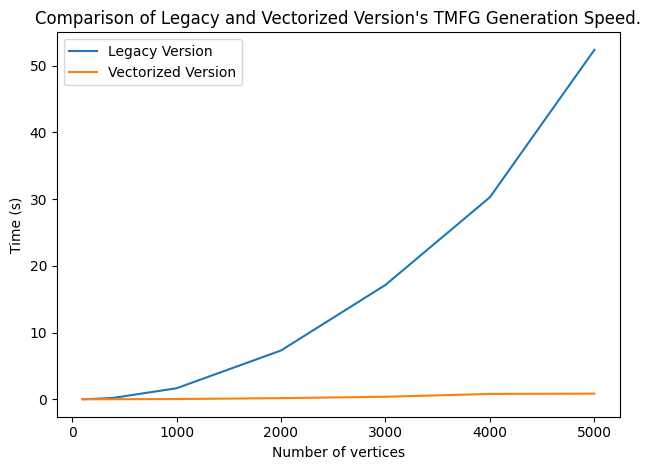

In [ ]:
result = np.array(result)
plt.plot(result[:, 0], result[:, 1], label='mst')
plt.plot(result[:, 0], result[:, 2], label='tmfg')
plt.plot(result[:, 0], result[:, 3], label='Line Network')
plt.title("Comparison of line tmfg and mst.")
plt.xlabel('Number of vertices')
plt.ylabel('Time (s)')
plt.legend()
plt.tight_layout()
plt.show()


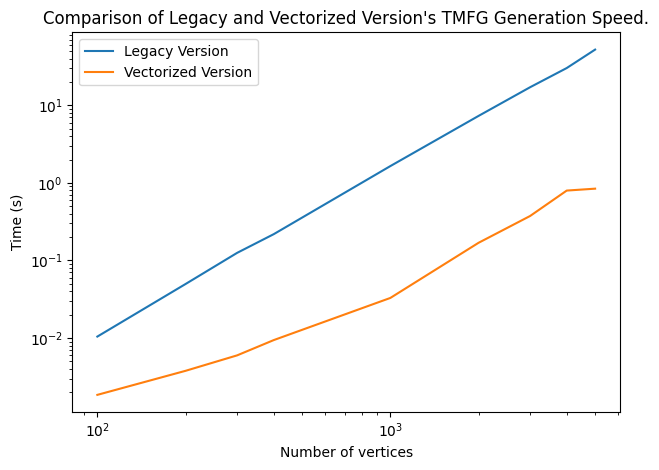

In [ ]:
plt.plot(result[:, 0], result[:, 1], label='mst')
plt.plot(result[:, 0], result[:, 2], label='tmfg')
plt.plot(result[:, 0], result[:, 3], label='Line Network')

plt.title("Comparison of line tmfg and mst.")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of vertices')
plt.ylabel('Time (s)')
plt.legend()
plt.tight_layout()
plt.show()


: 

: 